# DTSA 5511 Introduction to Deep Learning - WEEK 4
## Natural Language Processing with Disaster Tweets

### Overview

Twitter is one of the most commonly used social media. The goal of this project is to predict whether a tweet is announcing about a disaster or not. The kaggle competition can found in this link: https://www.kaggle.com/competitions/nlp-getting-started/overview.

The training dataset provided contains 7,503 unique tweets and will be used to train the NLP machine learning algorithm. In this specific exercise, RNN(Recurring Neural Network) will be used. RNN is commonly used in speech recognition and Natural Language Processing. It recognizes data's sequential chatacteristics which make it applicable to this analysis. The sequence of the words in each tweet is important otherwise, it would not make sense for the most part of it. (Source: https://www.techtarget.com/searchenterpriseai/definition/recurrent-neural-networks)

### Exploratory Data Analysis

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import LSTM, GRU
from keras.layers import Dense, Embedding, Bidirectional, Dropout, Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping

Let us look at the train and test datasets and analyze each dimensions/columns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print(df_train.head())
print(df_test.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


In [3]:
df_train.shape

(7613, 5)

The train data consists of 57% of target 1 and 43% of target 0. 

In [140]:
# label distribution 
df_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

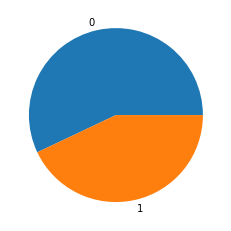

In [138]:
plt.pie(df_train['target'].value_counts(), labels=['0','1'])
plt.show()

In [4]:
df_test.shape

(3263, 4)

In [5]:
df_train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

### Model Architecture

We are only intrested in the tweet and label column. In this case, we will manually capture X_train and y_train as text and target columns respectively. 

The tokenizer will be applied in all of the dataset to attain uniformity once we get into predict mode, in other words, the train and test data will be combined to be tokenized. Once tokenized, we will apply padding to get equal number of dimensions in each entry and then apply the model.

The first RNN model consists of embedding layer, LTSM (Long Short-Term Memory) layer, apply a relu activation function and an output layer with Sigmoid activation function. Out of curiosity, I will try to use Bidirectional LTSM in the second model, as they say that it usually improves the model.

In [6]:
X_train = df_train['text'].values
y_train = df_train['target'].values
X_test = df_test['text'].values

In [7]:
# combine train and test and apply tokenizer
df_to_vector = np.concatenate((X_train, X_test))
df_to_vector

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ..., 'Green Line derailment in Chicago http://t.co/UtbXLcBIuY',
       'MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3',
       '#CityofCalgary has activated its Municipal Emergency Plan. #yycstorm'],
      dtype=object)

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_to_vector)

X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)

In [25]:
X_train[1]

'Forest fire near La Ronge Sask. Canada'

In [26]:
X_train_tokenized[1]

[168, 43, 212, 927, 8813, 8814, 1442]

In [27]:
y_train[1]

1

In [11]:
# pads sequences to the same length
max = max(len(x.split()) for x in df_to_vector)

X_train_padded = pad_sequences(X_train_tokenized, maxlen = max, padding='post')
X_test_padded = pad_sequences(X_test_tokenized, maxlen = max, padding='post')

In [118]:
# total num_words in the dataset or vocab
num_words = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(num_words, 100, input_length = max))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(0.001)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 31, 100)           2932000   
                                                                 
 lstm_8 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [119]:
# Create callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience = 5)]

In [120]:
model_history = model.fit(X_train_padded, y_train, batch_size = 128, callbacks = callbacks, epochs = 10, validation_split=0.2)

Epoch 1/10
48/48 [==============================] - 3s 20ms/step - loss: 0.6470 - accuracy: 0.6161 - val_loss: 0.5281 - val_accuracy: 0.7603
Epoch 2/10
48/48 [==============================] - 0s 9ms/step - loss: 0.3720 - accuracy: 0.8473 - val_loss: 0.4729 - val_accuracy: 0.7912
Epoch 3/10
48/48 [==============================] - 0s 9ms/step - loss: 0.1843 - accuracy: 0.9327 - val_loss: 0.7177 - val_accuracy: 0.7695
Epoch 4/10
48/48 [==============================] - 0s 10ms/step - loss: 0.0942 - accuracy: 0.9700 - val_loss: 0.7088 - val_accuracy: 0.7275
Epoch 5/10
48/48 [==============================] - 0s 10ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.8874 - val_accuracy: 0.7643
Epoch 6/10
48/48 [==============================] - 0s 10ms/step - loss: 0.0389 - accuracy: 0.9895 - val_loss: 1.0038 - val_accuracy: 0.7564
Epoch 7/10
48/48 [==============================] - 0s 10ms/step - loss: 0.0314 - accuracy: 0.9926 - val_loss: 0.9311 - val_accuracy: 0.7511


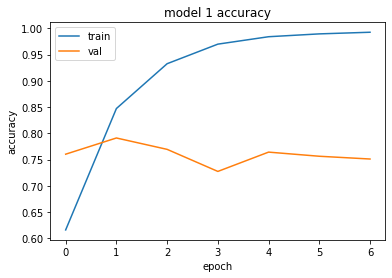

In [121]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

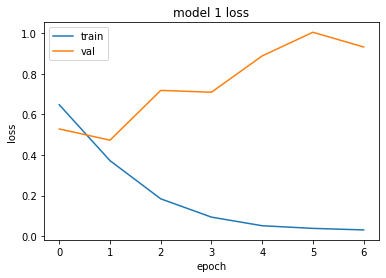

In [122]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [124]:
# model 1

model1 = Sequential()
model1.add(Embedding(num_words, 100, input_length = max))
model1.add(Bidirectional(LSTM(128)))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.RMSprop(0.001)
model1.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 31, 100)           2932000   
                                                                 
 bidirectional_4 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 flatten_5 (Flatten)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               65792     
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                     

In [127]:
model_history1 = model1.fit(X_train_padded, y_train, batch_size = 128, callbacks = callbacks, epochs = 10, validation_split=0.2)

Epoch 1/10
48/48 [==============================] - 1s 14ms/step - loss: 0.0635 - accuracy: 0.9783 - val_loss: 0.7914 - val_accuracy: 0.7538
Epoch 2/10
48/48 [==============================] - 1s 13ms/step - loss: 0.0462 - accuracy: 0.9862 - val_loss: 1.4570 - val_accuracy: 0.6540
Epoch 3/10
48/48 [==============================] - 1s 13ms/step - loss: 0.0274 - accuracy: 0.9905 - val_loss: 0.8990 - val_accuracy: 0.7032
Epoch 4/10
48/48 [==============================] - 1s 13ms/step - loss: 0.0232 - accuracy: 0.9918 - val_loss: 1.2649 - val_accuracy: 0.7111
Epoch 5/10
48/48 [==============================] - 1s 13ms/step - loss: 0.0274 - accuracy: 0.9921 - val_loss: 1.7422 - val_accuracy: 0.7019
Epoch 6/10
48/48 [==============================] - 1s 13ms/step - loss: 0.0162 - accuracy: 0.9933 - val_loss: 1.9229 - val_accuracy: 0.7098


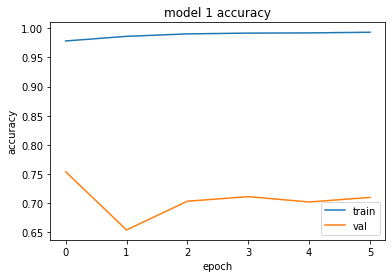

In [128]:
plt.plot(model_history1.history['accuracy'])
plt.plot(model_history1.history['val_accuracy'])
plt.title('model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

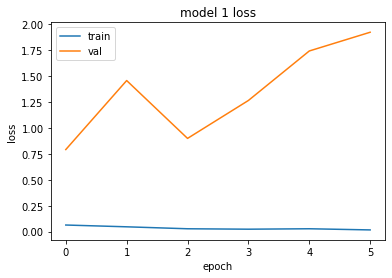

In [130]:
plt.plot(model_history1.history['loss'])
plt.plot(model_history1.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

### Conclusion

The first model resulted in a total score of 0.73061 and the second model 0.73643. The first model stopeed at epoch 7 while the second at epoch 6. The second model with Bidirectional LTSM was faster in achieving high training accuracy. Although the difference was not that high. Further reseach on Bidirectional LTSM suggests that it may be good for predicting future values and not on classification as it scans forward and backward, hence maybe the reason why it does not have much significant effect.

In [134]:
pred = model1.predict(X_test_padded)

In [135]:
df_final = pd.DataFrame([0 if  i < 0.5 else 1 for i in pred], columns= ["target"])
df_final["id"] = df_test["id"]

In [136]:
df_final.head()

,target,id
0,0,0
1,1,2
2,1,3
3,1,9
4,1,11


In [137]:
df_final.to_csv('submission.csv',index=False)

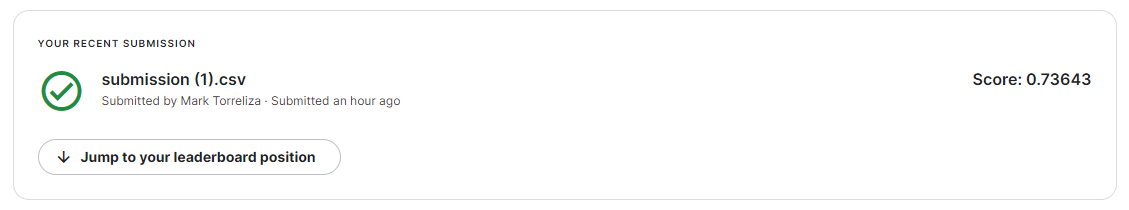